In [1]:
import os
import sys
sparclur_path = os.path.abspath('/Users/sdavis/PycharmProjects/sparclur/')
if sparclur_path not in sys.path:
    sys.path.append(sparclur_path)
from sparclur.parsers import MuPDF, Poppler, XPDF, Ghostscript
from sparclur.utils import image_highlight
from sparclur.prc import PRCViz

### Set the document

In [2]:
hello_world = os.path.join(sparclur_path, 'resources', 'hello_world_hand_edit.pdf')

### ...and load it into MuPDF

In [3]:
mupdf = MuPDF(hello_world)
mupdf

num_pages:	(Property) Returns number of pages in the document
can_reforge:	(Property) Boolean for whether or not reforge capability is present
reforge:	(Property) Returns the raw binary of the reconstructed PDF
reforge_result:	(Property) Message conveying the success or failure of the reforging
save_reforge:	Save the reforge to the specified file location
can_extract_text:	(Property) Boolean for whether or not text extraction is present
get_text:	Return a dictionary of pages and their extracted texts
clear_text:	Clear the cache of text extraction
get_tokens:	Return a dictionary of the parsed text tokens
compare_text:	Return the Jaccard similarity of the shingled tokens between two text extractors
can_render:	Boolean for whether or not rendering capability is present
validate_renderer:	(Property) Determines the PDF validity for rendering process
logs:	(Property) Any logs collected during the rendering process
caching:	(Property) Whether renders are cached or not
clear_renders:	Clears an

### Here's the first page rendered

mupdf: expected generation number (0 ? obj)


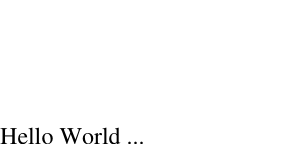

In [4]:
mupdf.get_renders(0)

In [5]:
mupdf.validate_renderer

{'valid': True, 'status': 'Valid with Warnings'}

<hr>

### And now Poppler

In [6]:
poppler = Poppler(hello_world)

In [7]:
poppler

num_pages:	(Property) Returns number of pages in the document
can_reforge:	(Property) Boolean for whether or not reforge capability is present
reforge:	(Property) Returns the raw binary of the reconstructed PDF
reforge_result:	(Property) Message conveying the success or failure of the reforging
save_reforge:	Save the reforge to the specified file location
can_extract_image_data:	(Property) Boolean for whether or not image data extraction 
                                                capability is present
contains_jpeg:	(Property) Returns True if jpeg data was extracted from the PDF
contains_images:	(Property) Returns True if image data was extracted from the PDF
images:	(Property) Returns the image data that was extracted from the PDF
validate_image_data:	(Property) Determines the PDF validity for image data extraction
can_extract_font:	(Property) Boolean for whether or not font extraction is present
non_embedded_fonts:	(Property) Returns true if the document is missing non-system f

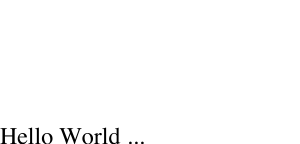

In [8]:
poppler.get_renders(0)

In [9]:
poppler.validate_renderer

{'valid': True, 'status': 'Valid'}

<hr>

### Let's compare the renders of MuPDF with Poppler

In [10]:
prc_result = mupdf.compare(poppler, page=0, full=True)
prc_result

mupdf: expected generation number (0 ? obj)


sim: 0.9812425811700849
entropy_sim: 0.9998592024573217
whash_sim: 0.99688720703125
phash_sim: 0.919677734375
sum_square_sim: 0.9994189493008889
ccorr_sim: 0.9997094869613647
ccoeff_sim: 0.9719029068946838
size_sim: 1.0

<hr>

### A number of different measures are calculated and the average 'sim' is a score between 0 and 1, 0 being entirely dissimilar and 1 being identical. Here we can see that the MuPDF and Poppler renders are nearly identical. We can visualize this difference using structural similarity seen below.

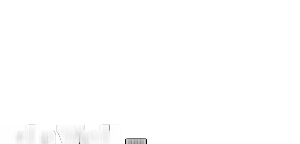

In [11]:
prc_result.diff

<hr>

### Now let's run Ghostscript

In [12]:
ghost = Ghostscript(hello_world)
ghost

num_pages:	(Property) Returns number of pages in the document
can_reforge:	(Property) Boolean for whether or not reforge capability is present
reforge:	(Property) Returns the raw binary of the reconstructed PDF
reforge_result:	(Property) Message conveying the success or failure of the reforging
save_reforge:	Save the reforge to the specified file location
can_extract_text:	(Property) Boolean for whether or not text extraction is present
get_text:	Return a dictionary of pages and their extracted texts
clear_text:	Clear the cache of text extraction
get_tokens:	Return a dictionary of the parsed text tokens
compare_text:	Return the Jaccard similarity of the shingled tokens between two text extractors
can_render:	Boolean for whether or not rendering capability is present
validate_renderer:	(Property) Determines the PDF validity for rendering process
logs:	(Property) Any logs collected during the rendering process
caching:	(Property) Whether renders are cached or not
clear_renders:	Clears an

<hr>

### The similarity is worse between MuPDF and Ghostscript

In [13]:
prc_2 = mupdf.compare(ghost, page=0, full=True)
prc_2

mupdf: expected generation number (0 ? obj)


sim: 0.8864108497150557
entropy_sim: 0.7357575938977321
whash_sim: 0.74359130859375
phash_sim: 0.893798828125
sum_square_sim: 0.9988987842807546
ccorr_sim: 0.9994493722915649
ccoeff_sim: 0.946969211101532
size_sim: 1.0

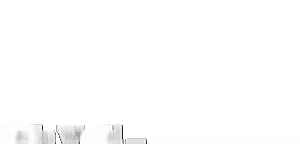

In [14]:
prc_2.diff

<hr>

### Let's highlight the region with the most dissimilar Shannon entropy measures. We can see that the 'W' is the most off (though still fairly identical to the naked eye).

mupdf: expected generation number (0 ? obj)


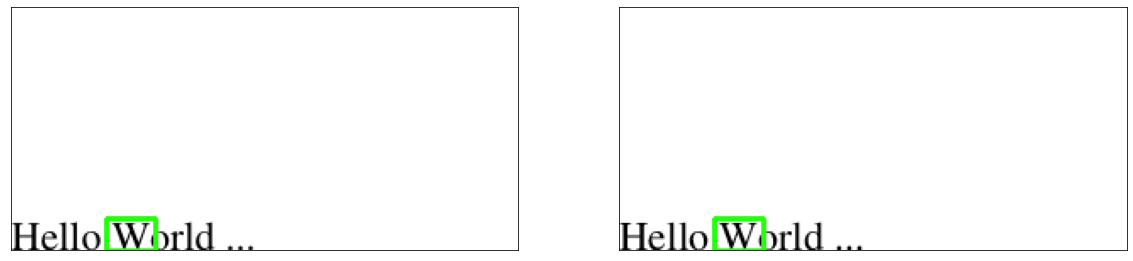

In [15]:
image_highlight(mupdf.get_renders(0), ghost.get_renders(0), min_region=120, info_loss=0.7, display_height=10, display_width=20)

<hr>

### Let's go ahead and run all of the pairwise comparisons for this page between all the SPARCLUR renderers.

mupdf: expected generation number (0 ? obj)


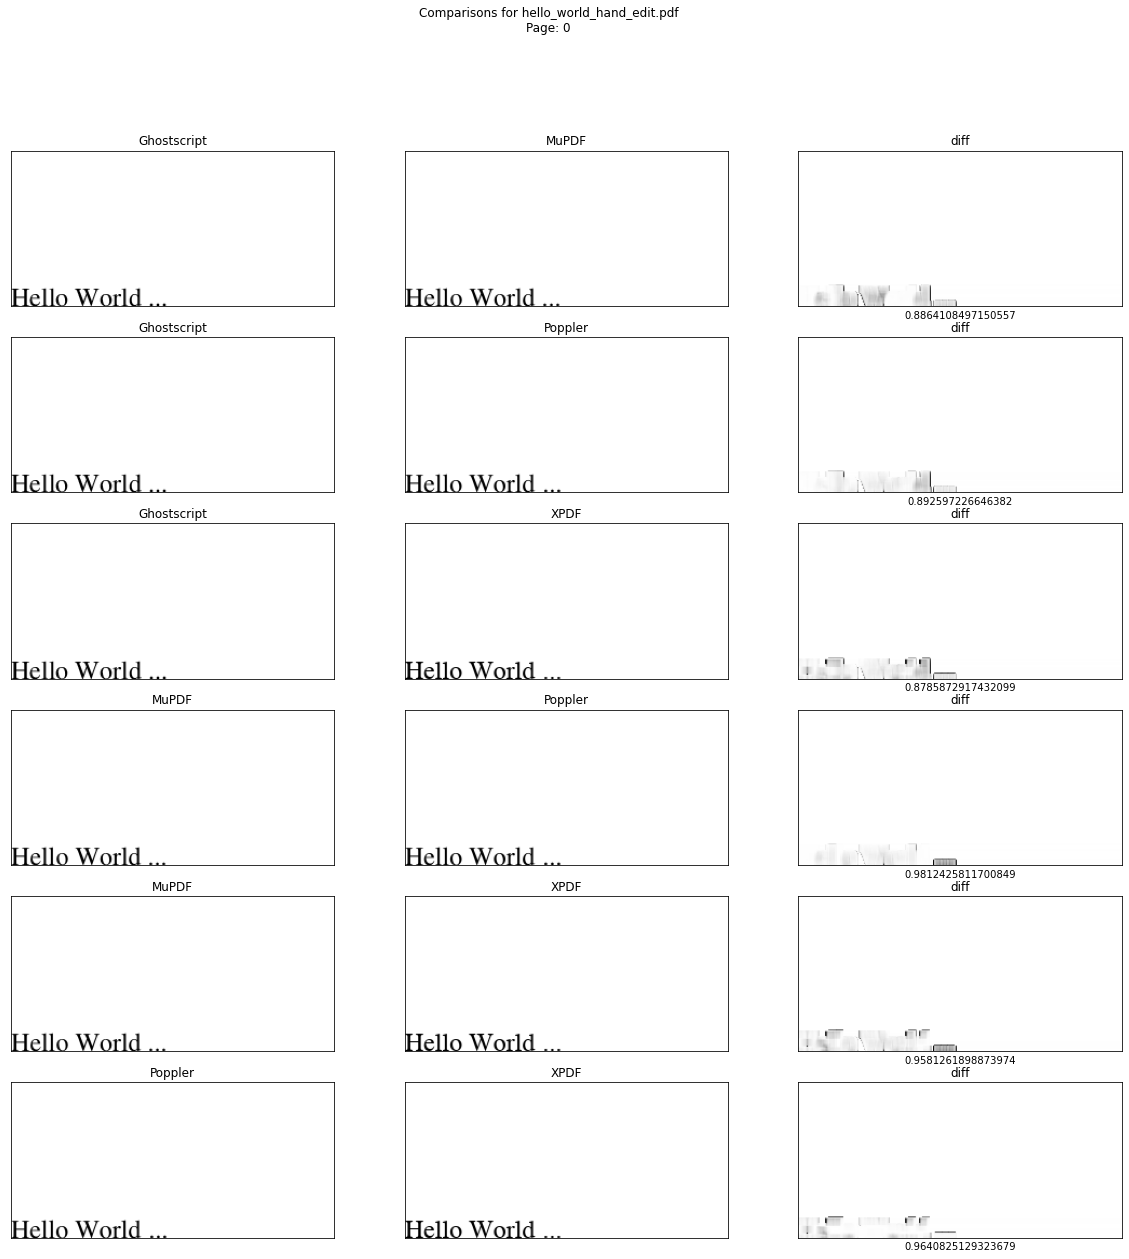

In [17]:
viz = PRCViz(hello_world, dpi=72)
viz.display(0, height=20, width=20)